# Выбор локации для скважины

Добывающей компании нефтянной компании нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [62]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Нам предоставленны данные георазведки трех регионов, каждый регион находится в отдельном файле. Целевой признак `product` - объем запасов нефти в скважинах региона, `id` - идентификатор месторождения, `f0`, `f1`, `f2` - значимые признаки.

In [66]:
df1.duplicated().sum(), df2.duplicated().sum(), df3.duplicated().sum()

(0, 0, 0)

В данных отсутствуют пропуски и дубликаты.

## Обучение и проверка модели

Создадим функцию которая будет принимать датафреймы и возвращать уже обученные модели.

In [67]:
def personal_model(df):
    
    features_with_id = df.drop(['product'], axis=1)
    features = features_with_id.drop(['id'], axis=1)
    target = df['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=123)

    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predicted_valid, squared=False)
    predicted_mean = predicted_valid.mean()
    
    print(f'RMSE модели = {rmse}, средний запас предсказанного сырья = {predicted_mean}')
    plt.hist(target_train)
    plt.show()
    return model, features_with_id

Создадим три модели обученные на данных разных регионов и построим графики распределения целевых признаков.

RMSE модели = 37.64786282376177, средний запас предсказанного сырья = 92.54936189116306


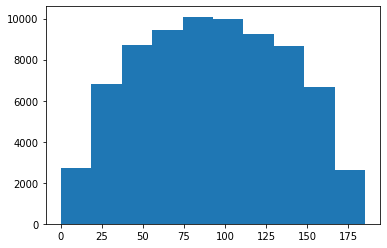

In [68]:
model_1, features_with_id_1 = personal_model(df1)

RMSE модели = 0.8954139804944313, средний запас предсказанного сырья = 69.28001860653976


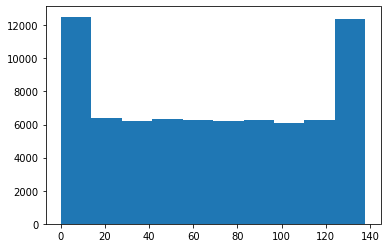

In [69]:
model_2, features_with_id_2 = personal_model(df2)

RMSE модели = 40.12803006598514, средний запас предсказанного сырья = 95.09859933591373


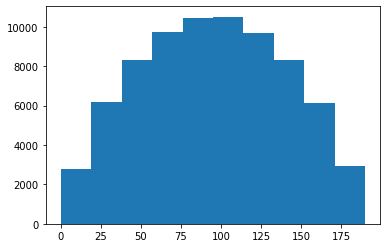

In [70]:
model_3, features_with_id_3 = personal_model(df3)

В модели построенной на данных второго региона получилось очень низкое значение RMSE, что говорит о высоком качестве предсказаний модели. Также на графиках мы можем обнаружить, что распределение целевого признака во втором регионе практически равномерное с выбросами в начале и в конце графика. В первом и третьем регионе нормальные распределения целевого признака c примерно одинаковыми показателями RMSE. Средний запас сырья при этом во втором регионе (69) значительно уступает первому (92) и третьему (95) регионам.

## Подготовка к расчёту прибыли

In [71]:
BUDGET = 10_000_000_000
REVENUE_PER_UNIT = 450_000
min_unit_volume = BUDGET / (REVENUE_PER_UNIT * 200)
min_unit_volume

111.11111111111111

Исходя из рассчетов, получается, что для безубыточной разработки скважины необходимый объем добычи составляет не менее 112 тыс. баррелей.

Рассчитаем средний объем добычи в каждом из регионов.

In [72]:
df1['product'].mean()

92.50000000000001

In [73]:
df2['product'].mean()

68.82500000000002

In [74]:
df3['product'].mean()

95.00000000000004

Во втором регионе наблюдаются самые низкие показатели объема добычи нефти, однако, как мы заметили ранее, в этом регионе модель наиболее успешно предсказывает показатели по предоставленным признакам.

## Расчёт прибыли и рисков 

Определим функцию для подсчета прибыли.

In [78]:
def profit_calc(df, features_with_id, model):
    features = features_with_id.sample(n=500, random_state=random, replace=True)
    predict_product = model.predict(features.loc[:, 'f0':'f2'])
    features['predicted_values'] = predict_product
    max_predicted_profit_list_id = features.sort_values(by='predicted_values', ascending=False)[:200]['id']
    real_values_list = df[df['id'].isin(max_predicted_profit_list_id)]['product']
    profit = real_values_list.sum() * REVENUE_PER_UNIT - BUDGET
    return profit

_____________________________

Исходя из полученных данных и моделей, воспользуемся техникой _Bootstrap_ для рассчетов прибыли и рисков каждого региона.

In [79]:
# Рассчеты для первого региона

random = np.random.RandomState(123)

bootstrap_profit_list = []

for i in range(1000):    
    profit = profit_calc(df1, features_with_id_1, model_1)
    bootstrap_profit_list.append(profit)
        
bootstrap_profit_list = pd.Series(bootstrap_profit_list)
mean_profit = bootstrap_profit_list.mean()
confidence_interval_95 = ((bootstrap_profit_list.quantile(0.025) / 1_000_000).round(2), (bootstrap_profit_list.quantile(0.975) / 1_000_000).round(2))
loss_prob = (bootstrap_profit_list < 0).mean()

print(f'Средняя прибыль для первого региона составляет {mean_profit / 1_000_000:.2f} млн. руб, \n\
95% доверительный интервал находится в диапазоне {confidence_interval_95} млн. руб, \n\
Риск убытков составляет {loss_prob:.2%}.')

Средняя прибыль для первого региона составляет 395.65 млн. руб, 
95% доверительный интервал находится в диапазоне (-106.36, 891.16) млн. руб, 
Риск убытков составляет 6.90%.


In [80]:
# Рассчеты для второго региона

random = np.random.RandomState(123)

bootstrap_profit_list = []

for i in range(1000):    
    profit = profit_calc(df2, features_with_id_2, model_2)
    bootstrap_profit_list.append(profit)
        
bootstrap_profit_list = pd.Series(bootstrap_profit_list)
mean_profit = bootstrap_profit_list.mean()
confidence_interval_95 = ((bootstrap_profit_list.quantile(0.025) / 1_000_000).round(2), (bootstrap_profit_list.quantile(0.975) / 1_000_000).round(2))
loss_prob = (bootstrap_profit_list < 0).mean()

print(f'Средняя прибыль для второго региона составляет {mean_profit / 1_000_000:.2f} млн. руб, \n\
95% доверительный интервал находится в диапазоне {confidence_interval_95} млн. руб, \n\
Риск убытков составляет {loss_prob:.2%}.')

Средняя прибыль для второго региона составляет 425.28 млн. руб, 
95% доверительный интервал находится в диапазоне (25.37, 815.9) млн. руб, 
Риск убытков составляет 1.90%.


In [81]:
# Рассчеты для третьего региона

random = np.random.RandomState(123)

bootstrap_profit_list = []

for i in range(1000):
    profit = profit_calc(df3, features_with_id_3, model_3)
    bootstrap_profit_list.append(profit)
    
bootstrap_profit_list = pd.Series(bootstrap_profit_list)
mean_profit = bootstrap_profit_list.mean()
confidence_interval_95 = ((bootstrap_profit_list.quantile(0.025) / 1_000_000).round(2), (bootstrap_profit_list.quantile(0.975) / 1_000_000).round(2))
loss_prob = (bootstrap_profit_list < 0).mean()

print(f'Средняя прибыль для третьего региона составляет {mean_profit / 1_000_000:.2f} млн. руб, \n\
95% доверительный интервал находится в диапазоне {confidence_interval_95} млн. руб, \n\
Риск убытков составляет {loss_prob:.2%}.')

Средняя прибыль для третьего региона составляет 346.97 млн. руб, 
95% доверительный интервал находится в диапазоне (-146.28, 833.89) млн. руб, 
Риск убытков составляет 9.70%.


## Вывод

В ходе проведенного исследования были рассмотрены три региона для выбора потенциально наиболее прибыльного региона по добыче нефти. 

На предоставленных данных были построены модели машинного обучения. В модели построенной на данных второго региона получилось очень низкое значение RMSE, что говорит о высоком качестве предсказаний модели. Также на графиках мы смогли обнаружить, что распределение целевого признака во втором регионе практически равномерное с выбросами в начале и в конце графика. В первом и третьем регионе нормальные распределения целевого признака c примерно одинаковыми показателями RMSE. Средний запас сырья при этом во втором регионе (69) значительно уступает первому (92) и третьему (95) регионам.

Были проведены рассчеты объема добычи, необходимого для безубыточной разработки скважины. Выяснилось, что необходимый объем добычи составляет не менее 112 тыс. баррелей.


Исходя из полученных данных и моделей, мы воспользовались техникой Bootstrap для рассчетов прибыли и рисков каждого региона. Оказалось, что из трех регионов, только второй подходит под нужный критерий вероятности рисков (меньше 2.5%), обладая вероятностью 1.9% и средней прибылью 425.28 млн. руб. Третий регион с вероятностью убытков 9.7% со средней прибылью 346.97 млн. руб, и первый регион с вероятностью 6.7% и средней прибылью 395.65 млн. руб. не подходят из за высокой степени риска.